In [4]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

# 1. Create Lattice

Flagged Bonds = [(25, 35), (26, 36), (27, 37), (28, 38), (29, 39)]


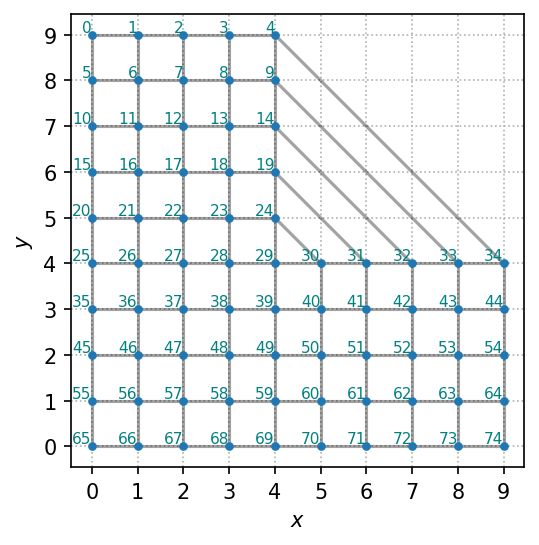

In [5]:
n = -1
hop_phase = np.exp(n * complex(0.0, 1.0) * np.pi / 2.0)

N = 10
lattice = SquareLattice(N, "open")
lattice.add_bonds(
    [(N // 2 - 1 + j * N, N // 2 * N + N - 1 - j) for j in range(N // 2)],
    [(2, 0) for i in range(N // 2)],
)
lattice.remove_sites([(i * N + j) for i in range(N // 2) for j in range(N // 2, N)])

# flagged_bonds = [(28, 29), (39, 40), (50, 51), (61, 62), (72, 73), (83, 84)]
# flagged_bonds = [(51, 52), (62, 63), (73, 74), (84, 85)]
# flagged_bonds = [(20, 25), (22, 27), (21, 26), (23, 28), (24, 29)]
# flagged_bonds = [(35, 4), (34, 9), (33, 14), (32, 19), (31, 24)]
# flagged_bonds = [(25, 36), (26, 37), (27, 38), (28, 39), (29, 40)]
# flagged_bonds = [(30, 31), (41, 42), (52, 53), (62, 64), (74, 75), (85, 86)]
flagged_bonds = [
    (N // 2 * (N // 2) + j, N // 2 * (N // 2) + N + j) for j in range(N // 2)
]
print("Flagged Bonds =", flagged_bonds)

lattice_sites = lattice.get_sites()
lattice_bonds = lattice.get_bonds()
num_sites = lattice.get_num_sites()
lattice.plot(True)

In [6]:
mu = 0.5
delta = complex(0.5, 0.0)

Ham_constructor = HamiltonianConstructor(mu, 0.5, 0.5, delta)
H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
block_indices = Ham_constructor.get_block_indices(lattice.get_num_sites())

for flagged_bond in flagged_bonds:
    Ham_constructor.add_phase(H_direct_lattice, flagged_bond, hop_phase, num_sites)

energies, states = scipy.linalg.eigh(H_direct_lattice)

tol = 0.05
low_energy_indices = np.argwhere(np.abs(energies) < tol)[:, 0]
print(low_energy_indices)

print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))
print("Index of lowest absolute energy: ", gs_idx)

plt.xlabel("Energy Index")
plt.ylabel("Energy")
plt.grid(linestyle=":")
plt.title("Energy Eigenvalues of Chiral p-wave SC")
plt.scatter(range(len(energies)), energies, s=3)

AssertionError: Particle-Hole symmetry assertion failed

Index = 149
Nambu space coefficients [0.02306197 0.00101399 0.00092011 0.02092688]
Nambu space coefficients [0.01091208 0.00047978 0.00047038 0.01069819]
Nambu space coefficients [0.00935384 0.00041127 0.00043034 0.00978758]
Nambu space coefficients [0.00741495 0.00032602 0.00041072 0.0093413 ]
Nambu space coefficients [0.02650733 0.00116547 0.00110582 0.02515064]
Nambu space coefficients [0.01114208 0.00048989 0.00045909 0.01044157]
Nambu space coefficients [1.86526462e-04 8.20117305e-06 7.91857775e-06 1.80099150e-04]
Nambu space coefficients [5.37793043e-07 2.36456198e-08 6.96744688e-07 1.58466747e-05]
Nambu space coefficients [3.63654277e-04 1.59891075e-05 2.02496394e-05 4.60555286e-04]
Nambu space coefficients [1.48639584e-03 6.53536734e-05 4.18514431e-05 9.51864030e-04]
Nambu space coefficients [0.01059875 0.000466   0.00040929 0.00930875]
Nambu space coefficients [5.38039535e-05 2.36564575e-06 7.45134442e-07 1.69472453e-05]
Nambu space coefficients [5.09401222e-06 2.23972916e-07 

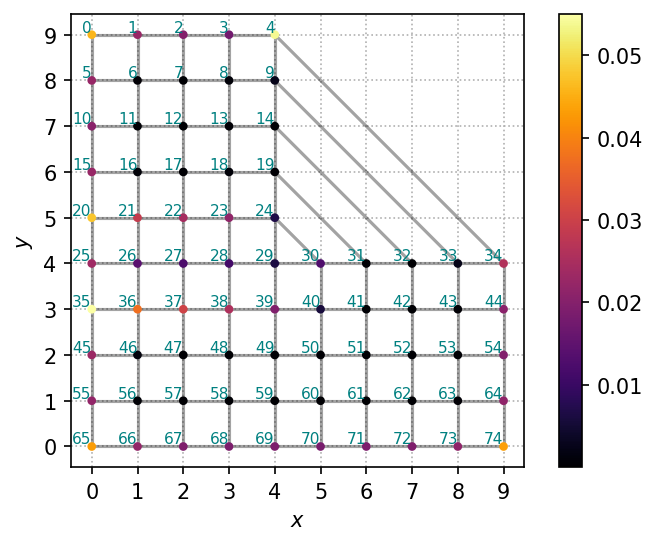

In [ ]:
for gs_idx in range(gs_idx, gs_idx + 1):
    print("Index =", gs_idx)
    gs_wave_function = states[:, gs_idx]

    gs_probabilities_nambu = np.square(np.abs(gs_wave_function))
    gs_probabilities = np.zeros(shape=(num_sites, 1))

    for site_idx in range(num_sites):
        gs_probabilities[site_idx] = np.sum(
            gs_probabilities_nambu[block_indices[site_idx]]
        )
        print(
            "Nambu space coefficients", gs_probabilities_nambu[block_indices[site_idx]]
        )

    x_values = [k[0] for k in lattice_sites]
    y_values = [k[1] for k in lattice_sites]

    color_map = plt.get_cmap("inferno")
    sc = lattice.plot(True, c=(gs_probabilities), cmap=color_map)

    plt.colorbar(sc)
    plt.show()

## Hop phase results

### Including bond nearest to disclination
n = 0: hop_phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04159891581792905

n = 1: hop_phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.040238925057125174

n = -1: hop_phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.04023892505712552

### Excluding bond nearest to disclination
n = 0: hop_phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04159891581792905

n = 1: hop_phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.040297000282122006

n = -1: hop_phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.040297000282122006

In [ ]:
half_filling_energy = np.sum(energies[0 : 2 * num_sites])
print("Half filling energy =", half_filling_energy)

Half filling energy = -114.8428295193916


### Including bond nearest to disclination
$$n=+1: -140.92351803436424$$


$$n=-1: -140.92351803436426$$


$$n=0: -141.16633516847492$$


$$n=2: -140.51117786827353$$


### Exluding bond nearest to disclination
$$n=+1: -140.98592954483732$$


$$n=-1: -140.98592954483732$$


$$n=0: -141.16633516847492$$


$$n=2: -140.66173659874394$$

n = 1: -144.03423246662726


n = -1: -143.88209472829487


n = 0:  -145.10834469612362

